In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import mnist

### Load The dataset

In [240]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [20]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

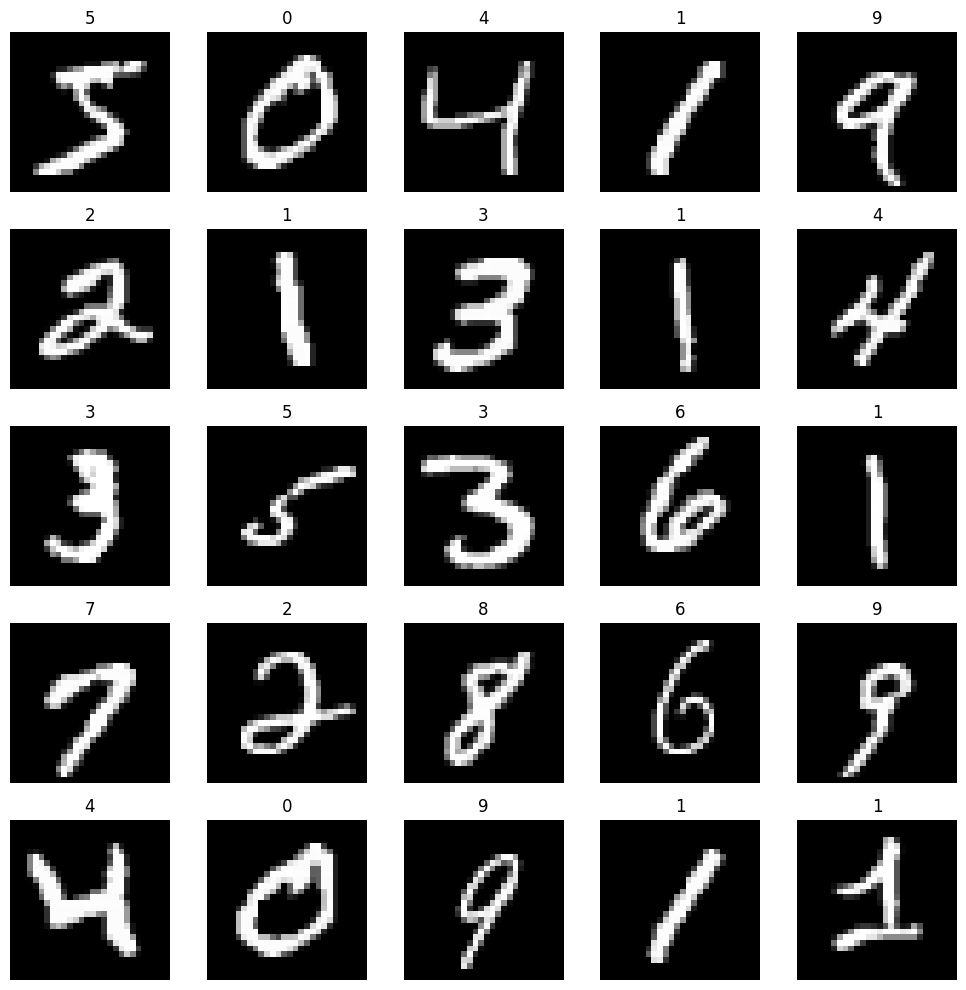

In [44]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap = 'grey')
    ax.set_title(y_train[i])
    ax.axis('off');
plt.tight_layout()

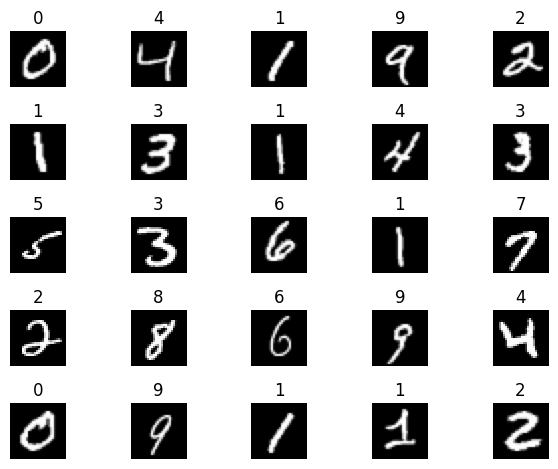

In [52]:
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(X_train[i], cmap = 'gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.tight_layout()

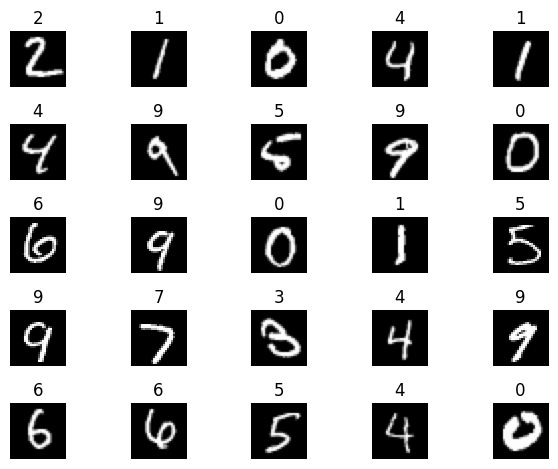

In [54]:
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(X_test[i], cmap = 'gray')
    plt.title(y_test[i])
    plt.axis('off')
plt.tight_layout()

In [242]:
# normalizing the data
X_train, X_test = X_train/255, X_test/255

In [244]:
X_train.shape

(60000, 28, 28)

### convert 2D to 1D

In [103]:
X_train[0].shape

(28, 28)

In [105]:
num = np.array([[5,6,7,], [1,9,3]])

In [107]:
num

array([[5, 6, 7],
       [1, 9, 3]])

In [109]:
np.reshape(num, num.size)

array([5, 6, 7, 1, 9, 3])

In [111]:
num.reshape(-1)

array([5, 6, 7, 1, 9, 3])

In [113]:
num.ravel()

array([5, 6, 7, 1, 9, 3])

In [115]:
num.flatten()

array([5, 6, 7, 1, 9, 3])

In [128]:
temp = X_train.flatten()
temp.shape

(47040000,)

In [144]:
# temp = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
# temp = X_train.reshape((X_train.shape[0], -1))
temp = X_train.reshape((-1, X_train[0].size))
temp.shape

(60000, 784)

In [246]:
X_train = X_train.reshape(-1, X_train[0].size)
X_test = X_test.reshape(-1, X_test[0].size)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

### prepare the output variable

In [163]:
import seaborn as sns

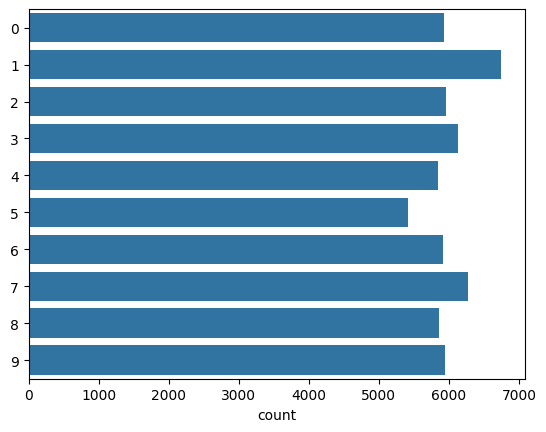

In [167]:
sns.countplot(y = y_train);

In [171]:
y_train.shape

(60000,)

In [248]:
y_train_new = tf.keras.utils.to_categorical(y_train)
y_test_new = tf.keras.utils.to_categorical(y_test)
y_test_new.shape, y_train_new.shape

((10000, 10), (60000, 10))

### build the model

In [252]:
import gc

In [254]:
# del model
# gc.collect()
# gc.collect()

0

In [258]:
model = tf.keras.Sequential([

    # input layers
    tf.keras.Input(shape = (784,)),
    tf.keras.layers.Dense(512, activation = 'relu'),

    #Hidden layers
    tf.keras.layers.Dense(256, activation = 'relu'),

    #output layer

    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [200]:
from tensorflow.keras.utils import plot_model

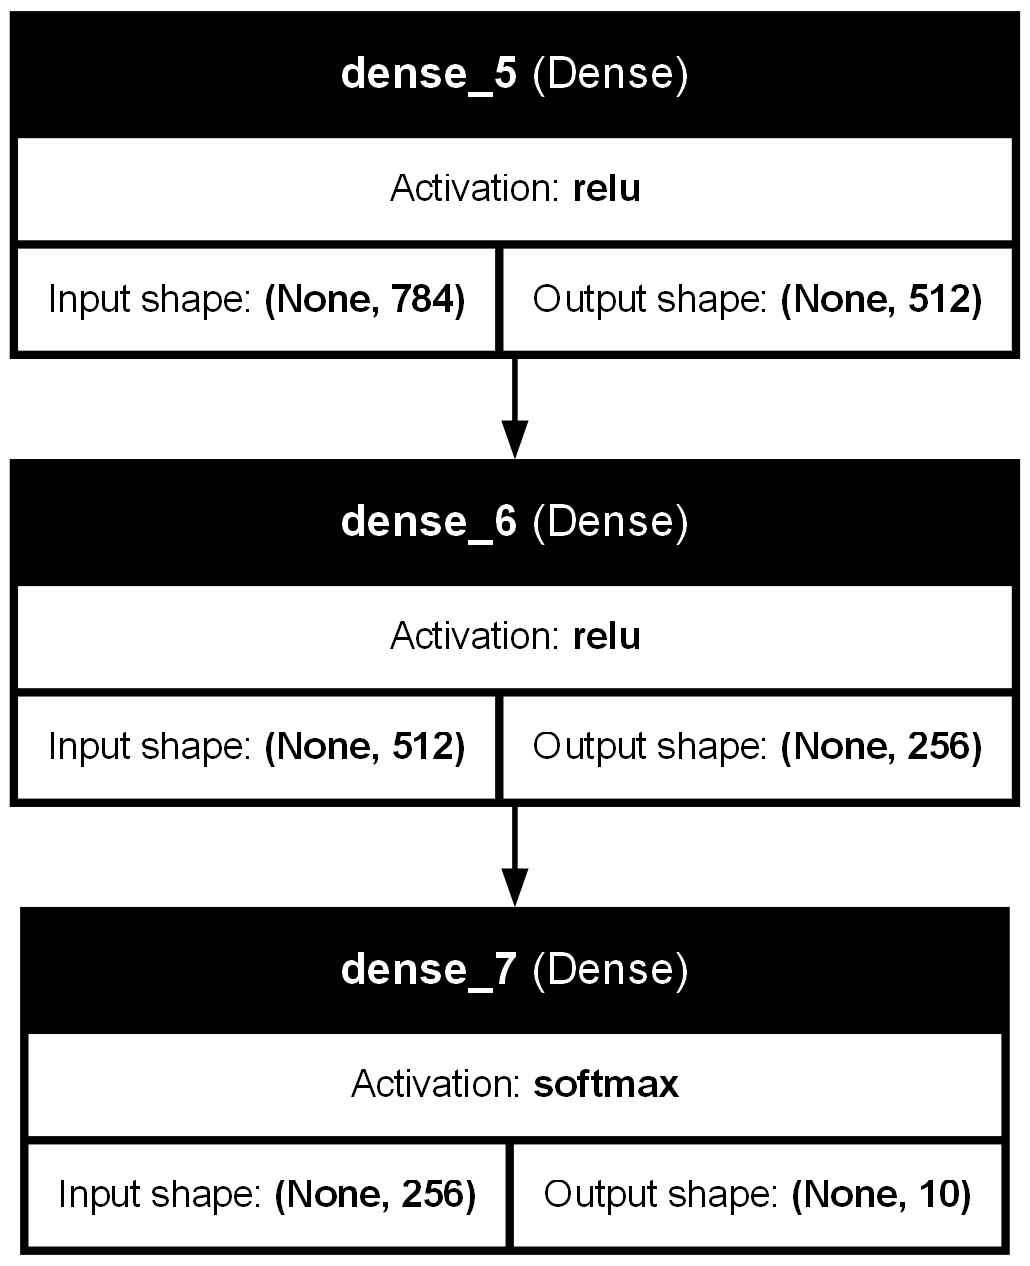

In [208]:
plot_model(model, show_layer_activations = True, show_shapes = True, show_layer_names= True)

In [210]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

### compile the model

In [260]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

### Train the model

In [262]:
model.fit(X_train, y_train_new, epochs = 10, batch_size = 10)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.9093 - loss: 0.2972
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9716 - loss: 0.0925
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9798 - loss: 0.0655
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9843 - loss: 0.0481
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9869 - loss: 0.0422
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9890 - loss: 0.0359
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9899 - loss: 0.0356
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9916 - loss: 0.0285
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9932 - loss: 0.0272
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9925 - loss: 0.0269


#### Evaluate the model

In [264]:
model.evaluate(X_test, y_test_new, batch_size = 1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.9749 - loss: 0.1377


[0.11675870418548584, 0.9797000288963318]

In [266]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(-0.5, 27.5, 27.5, -0.5)

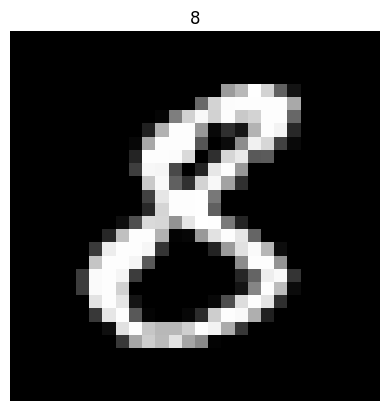

In [272]:
new = X_test[1234]
plt.imshow(new, cmap = 'grey')
plt.title(y_test[1234])
plt.axis('off')

In [304]:
new = new.reshape(1, 784)
new = new / 784
probs = model.predict(new, verbose = False)
print(probs.argmax())

8


In [325]:
import os
import cv2

In [415]:
im = cv2.imread(r"C:\Users\DAI.STUDENTSDC\Downloads\new-char.png", 0 )
im = cv2.resize(im, (28,28))

In [417]:
im.shape

(28, 28)

In [419]:
# im = np.resize(im, (28,28))

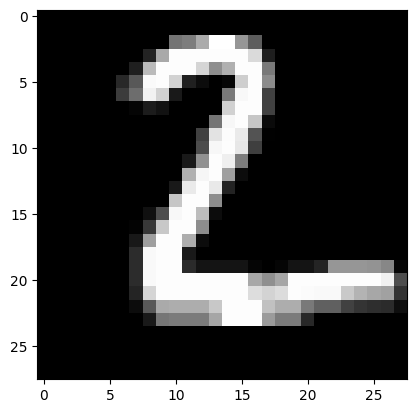

In [421]:
plt.imshow(im, cmap = 'grey')

In [423]:
im = im/255
im = im.reshape(1, -1)

In [425]:
im.shape

(1, 784)

In [427]:
x = model.predict(im)
x.argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


2

#### on manual data

In [539]:
im = cv2.imread(r"C:\Users\DAI.STUDENTSDC\Downloads\new-char1.jpg", 0 )

In [541]:
im = cv2.resize(im, (28,28))
im.shape

(28, 28)

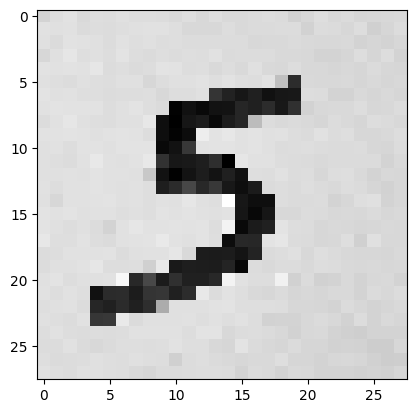

In [543]:
plt.imshow(im, cmap = 'grey')

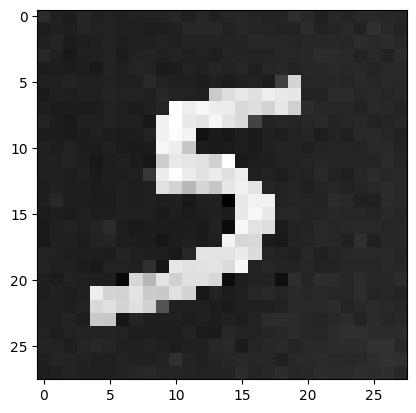

In [545]:
im = 255 - im
plt.imshow(im, cmap = 'grey')

In [547]:
im = im/255
im = im.reshape(1, -1)

In [549]:
x = model.predict(im)
x.argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


8